In [1]:
import utils
import numpy as np
from model_03 import get_model
import losses
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras import optimizers
from datetime import datetime
import metrics

Using TensorFlow backend.


In [ ]:
img_size = 256
n_kernels = 1
p_valid = 0.15
d_train = "./data/{}/train/".format(img_size)
files = utils.get_files(d_train, verbose=False)
files = files
n_valid = int(len(files) * p_valid)
files_valid = files[:n_valid]
files_train = files[n_valid:]
d = datetime.now().strftime("%m_%d_%Y_%H_%M_%S")
f_model = "model_k{}_s{}_{}.h5".format(str(n_kernels), str(img_size), d)
X_train, Y_train = utils.load_data(files_train)
X_valid, Y_valid = utils.load_data(files_valid)
n_ones = np.sum(Y_train) + np.sum(Y_valid)
n_total = np.prod(Y_train.shape) + np.prod(Y_valid.shape)
n_zeros = n_total - n_ones
weights_zero = n_ones / n_total
weights_ones = n_zeros / n_total
weights_zero = 0.04
weights_ones = 0.96

In [ ]:
model = get_model(img_size, n_kernels)
print(model.summary())

In [ ]:
mymetrics = ['accuracy', metrics.acc_zeros, metrics.acc_ones,
             metrics.mae_zeros, metrics.mae_ones, metrics.true_positives,
             metrics.true_negatives, metrics.false_positives,
             metrics.false_negatives]
myloss = losses.make_bce_loss(weights_ones, weights_zero)
myoptimizer = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.99, nesterov=True)
model.compile(loss=myloss, optimizer=myoptimizer, metrics=mymetrics)

In [ ]:
cb_es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
cb_cp = ModelCheckpoint(f_model, monitor='val_loss',
                        save_best_only=True, verbose=1),
cb_tb = TensorBoard(log_dir="logs/{}".format(d))
callbacks = [cb_cp, cb_tb]

In [ ]:
results = []
for lr in [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]:
    print("*"*10, str(lr) "*"*10, "\n", "*"*30)
    myoptimizer = optimizers.SGD(lr=lr, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss=myloss, optimizer=myoptimizer, metrics=mymetrics)
    hist = model.fit(x=X_train,
                     y=Y_train,
                     batch_size=1,
                     epochs=X_train.shape[0],
                     verbose=2,
                     callbacks=callbacks,
                     validation_data=(X_valid, Y_valid))
    results.append((lr, hist))

In [13]:
import matplotlib.pyplot as plt

[0.0003239611558487378, 0.0003132783636483297, 0.00030291854926351743, 0.0002928730051856496, 0.0002831332223372483, 0.00027369088674456096, 0.0002645378762271032, 0.00025566625710554095, 0.0002470682809292046, 0.0002387363812244706]


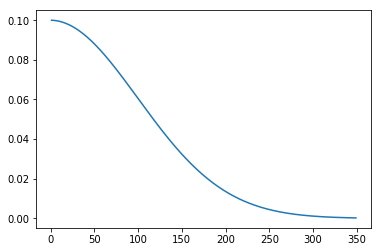

In [44]:
lr = 0.1
decay = 1e-4
epochs = list(range(1, 350, 1))
lrts = []
for e in epochs:
    lr = lr * 1/(1 + decay * e) 
    lrts.append(lr)

plt.plot(epochs, lrts)
print(lrts[-10:])

In [30]:
lrts[-5:]

[0.00027369088674456096,
 0.0002645378762271032,
 0.00025566625710554095,
 0.0002470682809292046,
 0.0002387363812244706]